# Week 1: Recap on $z$-transform

In [1]:
import numpy as np
import sympy as sy
import scipy.signal as sig

import matplotlib.pyplot as plt

import utils as utils

%matplotlib inline

sy.init_printing()
utils.load_custom_styles()

## Convergence vs Divergence of geometric series

A geometric series is said to **converge** if the sum is a finite value. When the sum goes to postive or negative infinity, then we say that the series **diverges**. An infinite geometric series will converge if the absolute value of the common ratio $r$ is between zero and one i.e., $0 > |r| < 1$

## Eigenfunctions of LTI systems

In general, any signal that passes through an LTI system changes its shape. However, the complex exponential sequence retains its shape.

The complex exponential sequence is given as:
$$
x[n] = z^{n}
$$
where $z$ is a complex variable.

Given an LTI system with the the **system function** or **transfer function** $H(z)$, the output signal is given by:

$$
y[n] = H(z) z^{n}
$$

This means that the output sequence is the input sequence multiplied by the function value $H(z)$.

Complex exponential sequences $z^{n}$ are **eigenfunctions** of LTI systems because their shape do not change when passing through an LTI system.

The value of $H(z)$ is the **eigenvalue** associated with the eigenfunction $z^{n}$.

## Motivation for the $z$-transform

If we can express an input signal to an LTI system as a linear combination of complex exponentials, i.e.,

$$
x[n] = \sum_{k} c_k z_k^{n}, \text{ for all } n
$$

then because of the linearity property, the output will be:

$$
y[n] = \sum_{k} c_k H(z_k) z_k^n
$$

This allows us to analyse the system in a different way. For example, we can remove or filter out certain complex exponential components of the input signal. If $H(z_k) = 0$ for some $z_k$ then the corresponding exponential sequence does *not* pass through the system.

So the $z$-transform is a tool to decompose any signal as a linear combination of complex exponentials. This allows to understand, analyse and design LTI systems. In addition, it provides insight into LTI systems' effect on input signal.


## Computing the $z$-transform

The $z$-transform of a sequence $x[n]$, denoted $X(n)$, can be computed as follows:

$$
X(z) = \sum_{n = - \infty}^{\infty} x[n] z^{-n}
$$
where the independent variable $z$ is a complex number.

The above $z$-transform is bidirectional because the summation is from $-\infty$ to $\infty$. If the sum start from $n=0$ then we have unidirectional $z$-transform. Sometimes, the summation in equation above is finite.

## Understanding $z$

A complex number $z=r e^{j\omega}$ can be visualised as a point in the complex plane.

<img src="figures/lecture-01/points-in-the-complex-plane.png" width="800" />


Notice that $r = |z|$

## Region of Convergence (ROC)

For any given sequence $x[n]$, the set of values of $z$ for which the sum converges (i.e., the sum is a finite value) is known as the region of convergence (ROC) of the $z$-transform.

<div class="extra">
<p>
    ROC gives us the values of $z$ for which the $z$-transform exists or is defined. This means that $X(z)$ is not defined outside the region of convergence even if the formula for $X(z)$ returns some results for these values.
</p> 
<p>
  The $z$-transform of a sequences consists 1) an algebraic formula and 2) its associated ROC. To uniquely specify a sequence $x[n]$, we need both $X(z)$ and its ROC.
</p>

</div>

## Zeros and poles

The values of $z$ for which $X(z) = 0$ are called **zeros**.

The values of $z$ for which $X(z)$ is infinite are called **poles**.

Since the ROC corresponds to values of $z$ for which $X(z)$ is finite, ROC does not include any poles.

<img src="figures/lecture-01/figure-3.2.png" width="700" />


## Example 3.4: z-transform of the causal exponential sequence

Let us compute the $z$-transform and the ROC of the causal exponential sequence:

$$
x[n] = a^{n} u[n]
$$

where $u[n]$ is the unit step sequence.

Step 1: plug the sequence into the $x$-transform:

$$
X(z) = \sum_{n = - \infty}^{\infty} a^n u[n] z^{-n}
$$

Step 2: since the unit step sequence is zero $u[n]=0$ when $n < 0$ then we can safely ignore the summation from $-\infty$ to $0$. Also when $n \leq 0$ then $u[n]=1$ so we can simply remove ignore the unit step sequence all together:

$$
X(z) = \sum_{n = 0}^{\infty} a^n z^{-n}
$$

Step 3: to make it easier to find the common ratio $r$, we should rearrange the product inside the summation so we get something like $c (r)^{n}$ where $c$ is some constant. To do that we can rewrite the expression:

$$
X(z) = \sum_{n = 0}^{\infty} (a z^{-1})^n
$$

Step 4: now we just need to generate the sum. The first term is 1 because when $n=0$ then $(az^{-1})^0=1$. The second term is $(az^{-1})^1$. And so on:

$$
X(z) = 1 + az^{-1} + (az^{-1})^2 + \cdots
$$

Step 5: since the sum is infinte, we can use following formula when the common ratio is less than 1:

$$
\frac{\text{first term}}{1- \text{common ratio}}
$$
So the $z$-transform is:
$$
X(z) = \frac{1}{1-az^{-1}}
$$

The formula can only be used when the common ratio $|r| < 1$. In this exercise, this means that $|az^{-1}|<1$ or $|a/z|<1$.

We can use the condition to compute the ROC. We know the condition $\mid \frac{a}{z} \mid$ when $|z| > |a|$. Therefore, the ROC is $|z| > |a|$

There is a zero at $z=0$ because:
$$
X(z) = \frac{1}{1-az^{-1}} = \frac{z}{z-a}
$$

In [2]:
a,z = sy.symbols('a,z')
f = 1/(1- a * z**(-1))
sy.simplify(f)

Figure 3.3. visualises the causal exponential sequence and the ROC for different values of $a$.

<img src="figures/lecture-01/figure-3.3.png" width="700" />


## Common $z$-transform pairs

<img src="figures/lecture-01/table-3.1-common-z-transform-pairs.png" width="800" />


## Properties of $z$-transforms

- The ROC cannot include any poles
- The ROC is a single contigous region
- For finite duration sequences, the ROC is the entire $z$-place except $z=0$ or $z=\infty$
- For infinite duration sequences the ROC can have one of the following shapes (page 98):

<img src="figures/lecture-01/types-and-roc-infinite-sequences.png" width="350" />


## Representation of polynomials in Python

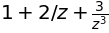

In [3]:
z = sy.symbols('z', complex=True)
B = 1+2*z**(-1) + 3 * z**(-3)
B

In [4]:
roots = sy.solve(B, z)